# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

Questions For Client 
====================
- Can you provide more context on how these predictions were made? For example, are these predictions based solely on Punxsutawney Phil, or do they also consider meteorological data?

- How accurate are these predictions historically when compared to actual meteorological outcomes?

- Are there additional datasets you would recommend or provide that could help enhance our analysis, such as meteorological data for each of these years?

- Are there any benchmarks or previous studies on this topic that we should compare our results against?


Questions For Professor 
=======================
- What specific performance metrics are most important for evaluating our predictive model in this case? what we feel is more appropiate , get all trues that you can. 

(test on 10 percent of the data) make a our own test set. 

- Beyond the model and the documentation, are there specific forms of visualizations or types of analysis you expect in our final report?
exploration go through steps 

- Would you recommend any specific statistical tests or analytical methods to understand the impact of various factors on Phil's predictions?
el nino la nina 

- Do you have any preferred data sources? Or are there constraints around data collection?

- About how many years of historical data should we analyze to make these predictions?
Peredicting for this year make it reusable for future. 

- What kind of performance improvements are expected in comparison to Punxsutawney Phil’s historical accuracy?

- Should we focus on any particular region (e.g., Pennsylvania, where Phil makes predictions), or should we generalize for wider use?





## Project Notes

- **Climatic Phenomena Investigation**
  - Research and incorporate data on La Niña or El Niño, as these climatic events may impact the likelihood of an early spring.

- **New Crop Development**
  - Investigate the potential for growing a new type of corn in harsher climates.
  - Assess the feasibility of achieving two harvests in one year if an early spring occurs, potentially doubling productivity.

- **Economic Decision Making**
  - Utilize the predictive model to determine the advisability of purchasing seeds early, based on the likelihood of an early spring. This decision impacts potential double profit or the risk of financial loss.

- **Model Reusability**
  - Design the model to be adaptable for use in future years to ensure its continued relevance and utility.

## Data Insights and Requirements

- **Historical Data Analysis**
  - Review indicates that 50% of the data suggests an early spring, correlating with a 65% increase in profits over regular years.

- **Weather Data Collection**
  - Use weather data collected by the intern, focusing on specific early spring indicators:
    - An early spring is indicated by a 5-day period where:
      - **Average Air Temperature:** Above 40°F.
      - **Minimum Air Temperature:** Above 32°F.
      - **Average Soil Temperature:** Above 50°F.
      - This period must occur on or before April 1st.
      - **Snow Condition:** No snow on the ground throughout this 5-day period.

## Operational Constraints

- **Seed Purchase Deadline**
  - Seeds must be purchased by February 25th to prepare for a potential early planting season, based on the model’s predictions.

## Testing and Validation

- **Test Set Creation**
  - Set aside 10% of the data to create a test set, ensuring that the model's accuracy is evaluated against unseen data.

## Historical Data Context

- **Additional Parameters for Analysis**
  - Include historical data on air temperatures and rainfall over the last 77 years to enhance model training and predictive accuracy.


In [8]:
# All of your imports here (you may need to add some)
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Frame the Problem and Look at the Big Picture

1. **Define the objective in business terms:**  
   <mark>Investigate the potential for growing a new type of corn in harsher climates. This aims to lead to more reliable planning for businesses and individuals affected by seasonal changes (e.g., agriculture, retail, event planning), potentially increasing profits by 60 percent if predicted correctly.</mark>

2. **How will your solution be used?**  
   <mark>The solution would likely be used by the client as a tool to understand when to plant this new corn.</mark>

3. **How should you frame this problem?**  
   <mark>As a binary classification problem where the goal is to predict one of two possible outcomes: early Spring or continued Winter.</mark>

4. **How should performance be measured? Is the performance measure aligned with the business objective?**  
   <mark>Performance should be measured using accuracy, precision, recall, and F1-score for the binary classification model. Accuracy gives a general sense of how well the model is performing, but precision and recall help understand the balance between predicting early Spring and extended Winter. If one class is more frequent than the other, focusing only on accuracy might lead to skewed results.</mark>

5. **What would be the minimum performance needed to reach the business objective?**  
   <mark>A minimum acceptable performance level might be set around 60% accuracy, which would represent a significant improvement. However, achieving an accuracy closer to 70-80% would provide more confidence and a stronger business case for users to adopt the model.</mark>

6. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?**  
   <mark>Weather forecasting models that predict seasonal shifts based on historical data and meteorological patterns. Existing tools that can be reused include Python libraries such as scikit-learn for machine learning, pandas for data analysis, and matplotlib/seaborn for visualization.</mark>

7. **Is human expertise available?**  
   <mark>Yes, the client who is an experienced farmer.</mark>

8. **How would you solve the problem manually?**  
   <mark>This is essentially an almanac, which has already been done. The manual process would involve: Collecting historical weather data and Punxsutawney Phil’s past predictions, identifying the key variables that might influence the seasonal shift, analyzing the patterns in the data, and making our own predictions based on the observed trends.</mark>

9. **List the assumptions you (or others) have made so far. Verify assumptions if possible.**  
   <mark>List your assumptions here for further verification, such as assumptions about data accuracy, the representativeness of historical data, or climatic conditions impacting predictive variables.</mark>


Get the Data
============
- List the data you need and how much you need

- Find and document where you can get that data

- Get access authorizations
Create a workspace (with enough storage space)
Get the data
Convert the data to a format you can easily manipulate (without changing the data itself)
Ensure sensitive information is deleted or protected (e.g. anonymized)
Check the size and type of data (time series, geographical, ...)
Sample a test set, put it aside, and never look at it (no data snooping!)







Explore the Data
================


1. Copy the data for exploration, downsampling to a manageable size if necessary.
2. Study each attribute and its characteristics: Name; Type (categorical, numerical, bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)
3. For supervised learning tasks, identify the target attribute(s)
4. Visualize the data
5. Study the correlations between attributes
Study how you would solve the problem manually
6. Identify the promising transformations you may want to apply
7. Identify extra data that would be useful (go back to “Get the Data”)


In [11]:
def read_Enso():
    """
    Reads the data file and returns a pandas dataframe.
    """
    return pd.read_csv("ENSO.csv") 

In [12]:
data = read_Enso()

In [13]:
data.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1/1/1950,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,2/1/1950,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,3/1/1950,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,4/1/1950,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,5/1/1950,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [14]:
data.shape

(882, 22)

In [19]:
data.describe()

,Year,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI
count,882.000000,882.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,875.000000,882.000000,574.0000,870.000000,534.000000,882.000000
mean,1986.251701,0.337971,23.250542,-0.049859,25.967731,-0.065743,27.016325,-0.079859,28.451727,-0.100904,-0.418517,-0.109002,0.0500,0.154138,-0.067228,-0.003175
std,21.230643,0.345478,2.328832,1.046806,1.233975,0.853805,0.945222,0.829843,0.679232,0.634455,1.361371,1.034818,0.9789,0.940521,0.987631,0.832301
min,1950.000000,-0.370000,19.060000,-1.900000,23.380000,-2.160000,24.560000,-2.220000,26.360000,-1.870000,-3.376000,-3.650000,-2.8000,-3.600000,-2.500000,-2.000000
25%,1968.000000,0.060000,21.220000,-0.740000,24.985000,-0.650000,26.340000,-0.670000,28.000000,-0.570000,-1.458500,-0.787500,-0.6000,-0.400000,-0.800000,-0.600000
50%,1986.000000,0.300000,23.140000,-0.240000,25.935000,-0.170000,27.060000,-0.110000,28.560000,-0.020000,-0.497000,-0.080000,0.1000,0.200000,-0.100000,-0.100000
75%,2005.000000,0.610000,25.230000,0.440000,26.902500,0.417500,27.690000,0.440000,28.977500,0.370000,0.384500,0.600000,0.7000,0.800000,0.500000,0.500000
max,2023.000000,1.340000,28.510000,4.030000,28.810000,3.070000,29.540000,2.720000,30.220000,1.550000,4.227000,2.870000,2.3000,2.900000,2.700000,2.600000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          882 non-null    object 
 1   Year                          882 non-null    int64  
 2   Month                         882 non-null    object 
 3   Global Temperature Anomalies  882 non-null    float64
 4   Nino 1+2 SST                  498 non-null    float64
 5   Nino 1+2 SST Anomalies        498 non-null    float64
 6   Nino 3 SST                    498 non-null    float64
 7   Nino 3 SST Anomalies          498 non-null    float64
 8   Nino 3.4 SST                  498 non-null    float64
 9   Nino 3.4 SST Anomalies        498 non-null    float64
 10  Nino 4 SST                    498 non-null    float64
 11  Nino 4 SST Anomalies          498 non-null    float64
 12  TNI                           875 non-null    float64
 13  PNA  

<Axes: >

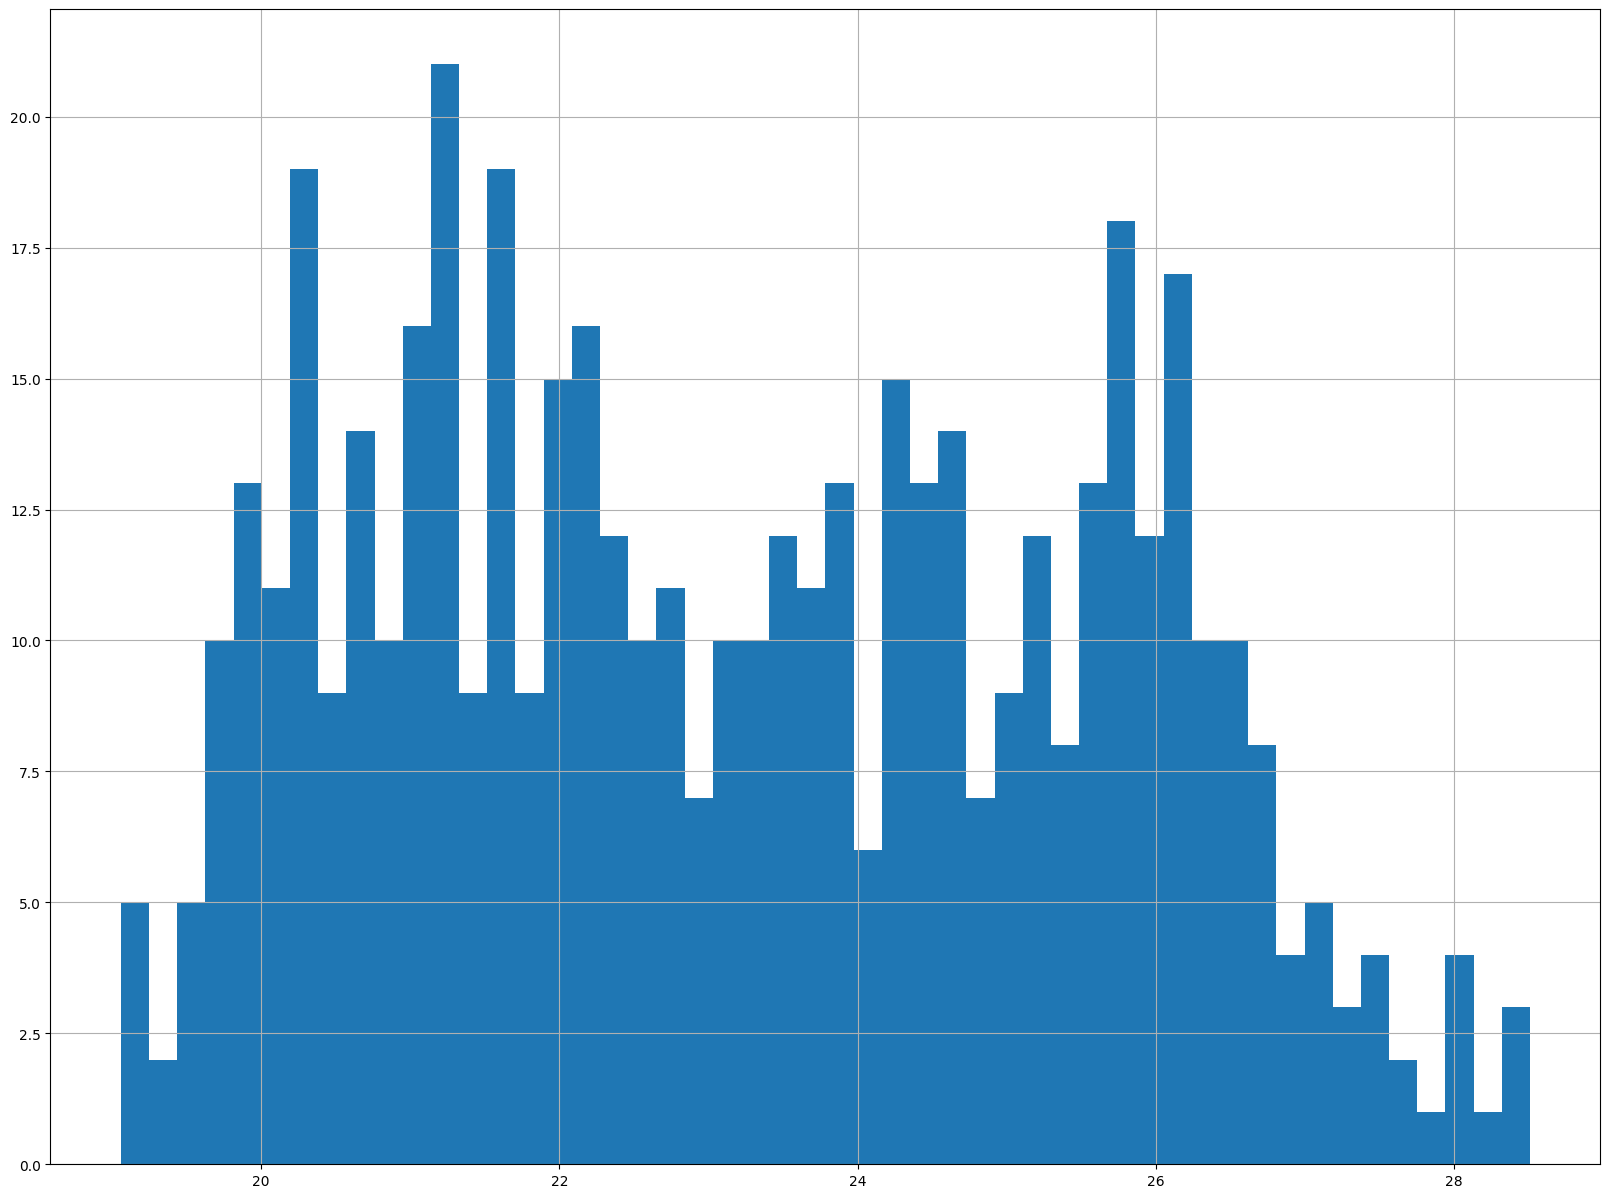

In [40]:
data["Nino 1+2 SST"].hist(bins=50, figsize=(20,15))

In [17]:
data.info(show_counts=True) # show_counts=True will show the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          882 non-null    object 
 1   Year                          882 non-null    int64  
 2   Month                         882 non-null    object 
 3   Global Temperature Anomalies  882 non-null    float64
 4   Nino 1+2 SST                  498 non-null    float64
 5   Nino 1+2 SST Anomalies        498 non-null    float64
 6   Nino 3 SST                    498 non-null    float64
 7   Nino 3 SST Anomalies          498 non-null    float64
 8   Nino 3.4 SST                  498 non-null    float64
 9   Nino 3.4 SST Anomalies        498 non-null    float64
 10  Nino 4 SST                    498 non-null    float64
 11  Nino 4 SST Anomalies          498 non-null    float64
 12  TNI                           875 non-null    float64
 13  PNA  

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Global Temperature Anomalies'}>,
        <Axes: title={'center': 'Nino 1+2 SST'}>,
        <Axes: title={'center': 'Nino 1+2 SST Anomalies'}>],
       [<Axes: title={'center': 'Nino 3 SST'}>,
        <Axes: title={'center': 'Nino 3 SST Anomalies'}>,
        <Axes: title={'center': 'Nino 3.4 SST'}>,
        <Axes: title={'center': 'Nino 3.4 SST Anomalies'}>],
       [<Axes: title={'center': 'Nino 4 SST'}>,
        <Axes: title={'center': 'Nino 4 SST Anomalies'}>,
        <Axes: title={'center': 'TNI'}>, <Axes: title={'center': 'PNA'}>],
       [<Axes: title={'center': 'OLR'}>, <Axes: title={'center': 'SOI'}>,
        <Axes: title={'center': 'MEI.v2'}>,
        <Axes: title={'center': 'ONI'}>]], dtype=object)

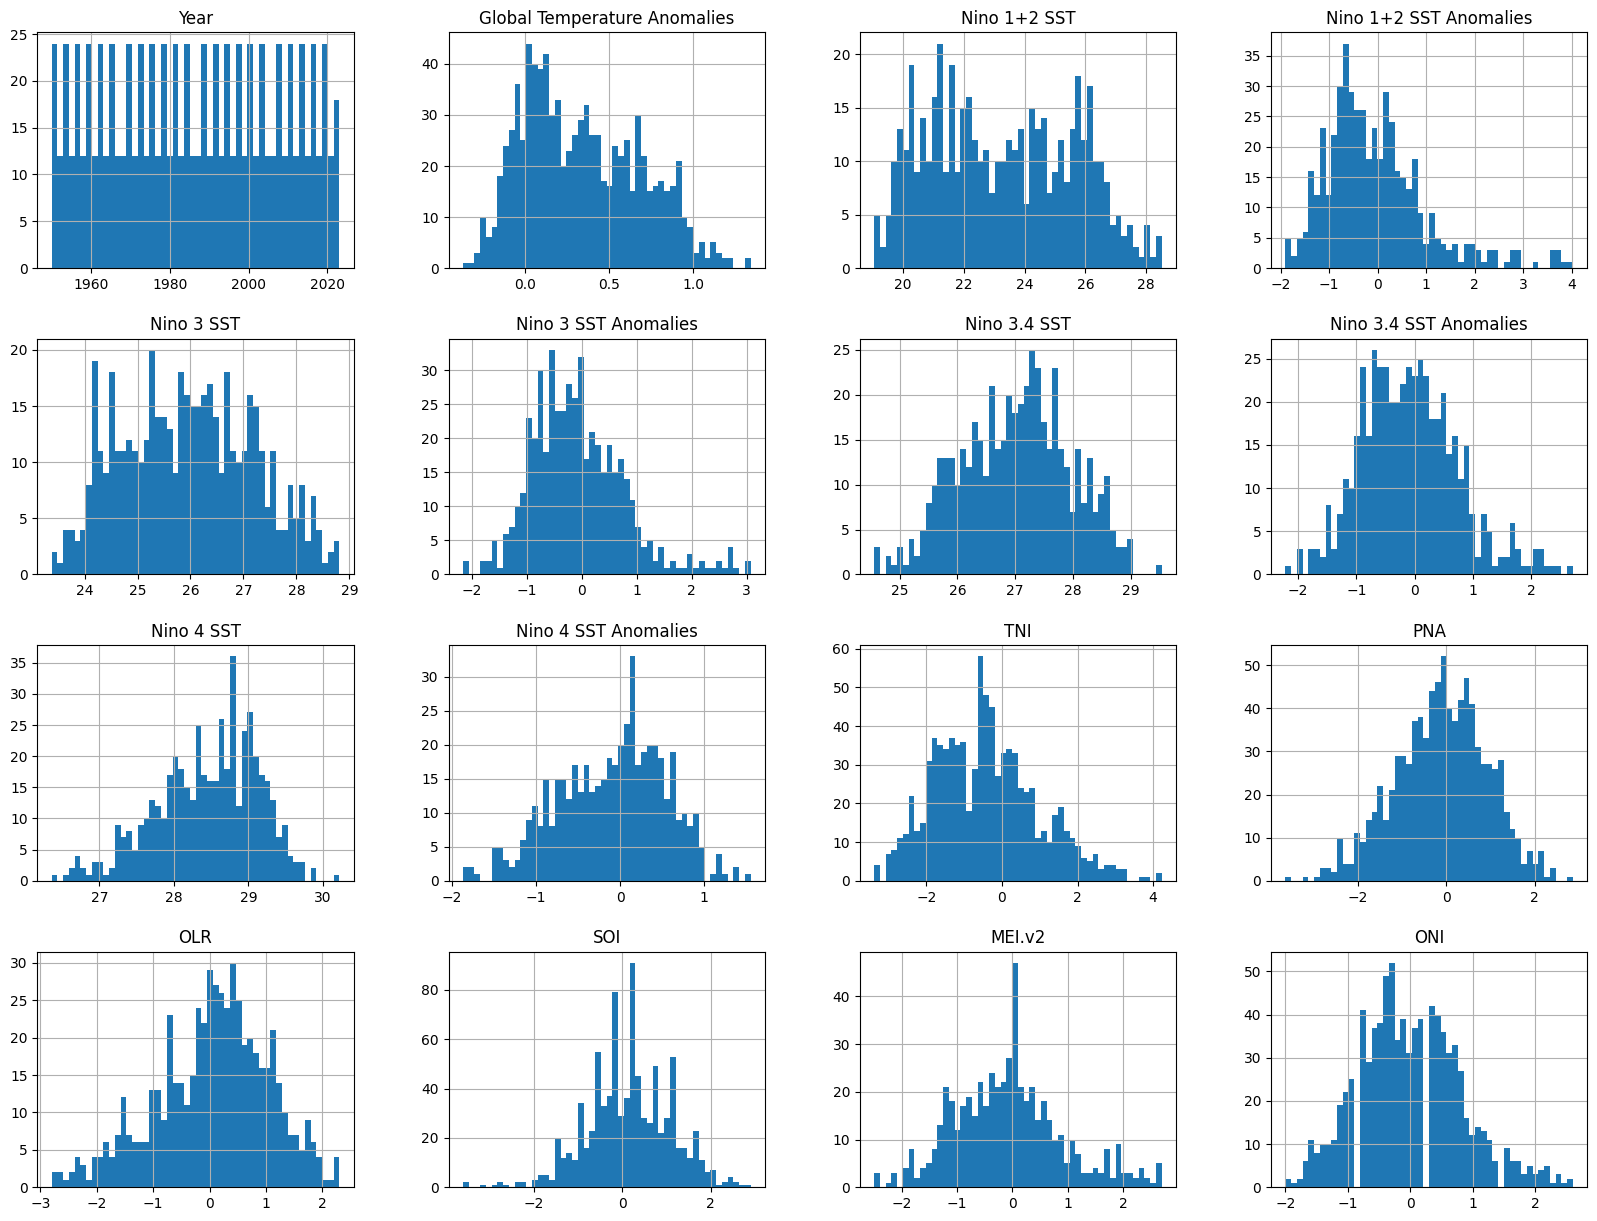

In [18]:
data.hist(bins=50, figsize=(20,15))

In [41]:
df = data.copy() # to avoid changing the original data

In [42]:
import pandas as pd

# Convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Define the current year and the year for which predictions are being made
prediction_year = 2024  # This should be set to the year you are making predictions for

# Filtering out unwanted data
# Drop all data from March to December for the prediction year
df = df[~((df['Date'].dt.year == prediction_year) & (df['Date'].dt.month > 2))]

# Include March to December from the year before the prediction year and shift these to the prediction year
df.loc[(df['Date'].dt.year == prediction_year - 1) & (df['Date'].dt.month > 2), 'Date'] = df['Date'] + pd.DateOffset(years=1)

# Reset the index after making modifications
df.reset_index(drop=True, inplace=True)

# Now check what your DataFrame looks like and ensure the changes are correct
print(df.head())
print(df.tail())

# Save the adjusted DataFrame
df.to_csv('ENSO_adjusted.csv', index=False)


        Date  Year Month  Global Temperature Anomalies  Nino 1+2 SST  \
0 1950-01-01  1950   JAN                         -0.20           NaN   
1 1950-02-01  1950   FEB                         -0.26           NaN   
2 1950-03-01  1950   MAR                         -0.08           NaN   
3 1950-04-01  1950   APR                         -0.16           NaN   
4 1950-05-01  1950   MAY                         -0.02           NaN   

   Nino 1+2 SST Anomalies  Nino 3 SST  Nino 3 SST Anomalies  Nino 3.4 SST  \
0                     NaN         NaN                   NaN           NaN   
1                     NaN         NaN                   NaN           NaN   
2                     NaN         NaN                   NaN           NaN   
3                     NaN         NaN                   NaN           NaN   
4                     NaN         NaN                   NaN           NaN   

   Nino 3.4 SST Anomalies  ...    TNI   PNA  OLR  SOI  Season (2-Month)  \
0                     NaN  ..